In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams['font.family'] = 'Malgun Gothic'
import datetime
import time

In [2]:
def get_gu_dong(df):
    df = df.copy()
    
    df['구'] = df['지번주소'].apply(lambda x: x.split(' ')[1])
    df['동'] = df['지번주소'].apply(lambda x: x.split(' ')[2])
    
    return df

In [3]:
bulktrade_basedir = './국토교통부_실거래가_공개시스템/집값분석/일괄구매/10호이상/'

In [4]:
yunrip_df = pd.read_csv(bulktrade_basedir+'연립다세대_일괄구매_전체.csv')
yunrip_df = yunrip_df[
    (yunrip_df['소유자'] == '서***~')
    |(yunrip_df['소유자'] == '한***~')
    |(yunrip_df['소유자'] == '에***~')
].reset_index(drop=True)
yunrip_df = get_gu_dong(yunrip_df)
print(yunrip_df.shape)
yunrip_df.head()

(17439, 16)


,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(만원/㎡),건물연식,부동산유형,소유자,구,동
0,서울특별시 강동구 길동 131-1,명일로16길 17-6,덕양빌,58.89,33.14,26300,5,2015.0,0.0,2015-07-10,446.595347,6.0,연립다세대,에***~,강동구,길동
1,서울특별시 강동구 길동 131-1,명일로16길 17-6,덕양빌,55.22,31.08,25050,5,2015.0,0.0,2015-07-10,453.639986,6.0,연립다세대,에***~,강동구,길동
2,서울특별시 강동구 길동 131-1,명일로16길 17-6,덕양빌,52.75,29.69,25200,2,2015.0,0.0,2015-07-10,477.725118,6.0,연립다세대,에***~,강동구,길동
3,서울특별시 강동구 길동 131-1,명일로16길 17-6,덕양빌,48.06,27.05,23450,2,2015.0,0.0,2015-07-10,487.931752,6.0,연립다세대,에***~,강동구,길동
4,서울특별시 강동구 길동 131-1,명일로16길 17-6,덕양빌,48.06,27.05,22900,4,2015.0,0.0,2015-07-10,476.487724,6.0,연립다세대,에***~,강동구,길동


In [5]:
officetel_df = pd.read_csv(bulktrade_basedir+'오피스텔_일괄구매_전체.csv')
officetel_df = officetel_df[
    (officetel_df['소유자'] == '서***~')
    |(officetel_df['소유자'] == '한***~')
].reset_index(drop=True)
officetel_df = get_gu_dong(officetel_df)
print(officetel_df.shape)
officetel_df.head()

(1254, 15)


,지번주소,도로명,건물(단지)명,전용면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(만원/㎡),건물연식,부동산유형,소유자,구,동
0,서울특별시 금천구 독산동 332-13,범안로15길 21,명도레이크캐슬,17.12,13150,2,2019.0,0.0,2019-08-16,768.107477,2.0,오피스텔,한***~,금천구,독산동
1,서울특별시 금천구 독산동 332-13,범안로15길 21,명도레이크캐슬,17.12,13150,2,2019.0,0.0,2019-08-16,768.107477,2.0,오피스텔,한***~,금천구,독산동
2,서울특별시 금천구 독산동 332-13,범안로15길 21,명도레이크캐슬,17.12,13550,2,2019.0,0.0,2019-08-16,791.471963,2.0,오피스텔,한***~,금천구,독산동
3,서울특별시 금천구 독산동 332-13,범안로15길 21,명도레이크캐슬,17.12,13550,2,2019.0,0.0,2019-08-16,791.471963,2.0,오피스텔,한***~,금천구,독산동
4,서울특별시 금천구 독산동 332-13,범안로15길 21,명도레이크캐슬,17.12,13550,2,2019.0,0.0,2019-08-16,791.471963,2.0,오피스텔,한***~,금천구,독산동


In [6]:
idx_list = []
for addr in tqdm(yunrip_df['지번주소'].unique()):
    addr_df = yunrip_df[yunrip_df['지번주소'] == addr]
    if addr_df['전용면적(㎡)'].max() / addr_df['전용면적(㎡)'].min() >= 1.9:
        [idx_list.append(i) for i in addr_df.index]

100%|████████████████████████████████████████████████████████████████████████████| 1098/1098 [00:01<00:00, 1037.57it/s]


In [7]:
len(idx_list)

2413

In [30]:
yunrip_selected_df = yunrip_df.loc[idx_list].reset_index(drop=True)
print(yunrip_selected_df.shape)
yunrip_selected_df.head()

(2413, 16)


,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(만원/㎡),건물연식,부동산유형,소유자,구,동
0,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.31,35.14,30100,3,2015.0,0.0,2015-12-01,516.206483,6.0,연립다세대,한***~,강동구,천호동
1,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,45.36,27.34,23700,4,2015.0,0.0,2015-12-01,522.486772,6.0,연립다세대,한***~,강동구,천호동
2,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.95,35.53,30150,3,2015.0,0.0,2015-12-01,511.450382,6.0,연립다세대,한***~,강동구,천호동
3,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.95,35.53,30150,2,2015.0,0.0,2015-12-01,511.450382,6.0,연립다세대,한***~,강동구,천호동
4,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,47.22,28.46,24000,5,2015.0,0.0,2015-12-01,508.259212,6.0,연립다세대,한***~,강동구,천호동


In [9]:
yunrip_selected_df.to_excel('SH_LH_또는_에뭐시기에서_일괄구매한_거래사례들_중_한_동에_전용면적_크기가_1점9배_차이나는_세대들이_있는_경우.xlsx', index=False)

In [10]:
yunrip_selected_df['전용면적별_단가평균'] = yunrip_selected_df[['지번주소', '건축년도', '전용면적(㎡)', '단가(만원/㎡)']].groupby(['지번주소', '건축년도', '전용면적(㎡)']).transform('mean')['단가(만원/㎡)']

In [11]:
yunrip_selected_df.drop(columns=['거래금액(만원)', '층', '단가(만원/㎡)'], inplace=True)
yunrip_selected_df = yunrip_selected_df.drop_duplicates().reset_index(drop=True)
print(yunrip_selected_df.shape)
yunrip_selected_df.head()

(1316, 14)


,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형,소유자,구,동,전용면적별_단가평균
0,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.31,35.14,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,516.206483
1,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,45.36,27.34,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,522.486772
2,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.95,35.53,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,511.450382
3,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,47.22,28.46,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,508.259212
4,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,54.96,33.12,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,522.197962


In [12]:
yunrip_selected_df.head(20)

,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형,소유자,구,동,전용면적별_단가평균
0,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.31,35.14,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,516.206483
1,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,45.36,27.34,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,522.486772
2,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,58.95,35.53,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,511.450382
3,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,47.22,28.46,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,508.259212
4,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,54.96,33.12,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,522.197962
5,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,52.60,31.70,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,500.000000
6,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,45.09,27.18,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,526.724329
7,서울특별시 강동구 천호동 111-34,천중로33길 7,엘림하우스,29.43,17.74,2015.0,0.0,2015-12-01,6.0,연립다세대,한***~,강동구,천호동,560.652396
8,서울특별시 강서구 화곡동 814-33,등촌로13다길 8-4,이레팰리스,56.30,32.14,2015.0,0.0,2015-10-22,6.0,연립다세대,한***~,강서구,화곡동,396.092362
9,서울특별시 강서구 화곡동 814-33,등촌로13다길 8-4,이레팰리스,46.85,26.75,2015.0,0.0,2015-10-22,6.0,연립다세대,한***~,강서구,화곡동,414.087513


In [13]:
yunrip_selected_df.to_excel('전용면적별_단가평균.xlsx', index=False)

In [14]:
yunrip_selected_df['주소별_최소전용면적'] = yunrip_selected_df[['지번주소', '건축년도', '전용면적(㎡)']].groupby(['지번주소', '건축년도']).transform('min')['전용면적(㎡)']
yunrip_selected_df['주소별_최대전용면적'] = yunrip_selected_df[['지번주소', '건축년도', '전용면적(㎡)']].groupby(['지번주소', '건축년도']).transform('max')['전용면적(㎡)']

In [15]:
yunrip_selected_df['주소별_최소전용면적_단가'] = np.nan
yunrip_selected_df['주소별_최대전용면적_단가'] = np.nan

In [16]:
for addr in tqdm(yunrip_selected_df['지번주소'].unique()):
    addr_df = yunrip_selected_df[yunrip_selected_df['지번주소'] == addr]
    min_area_price = addr_df[addr_df['전용면적(㎡)'] == addr_df['전용면적(㎡)'].min()]['전용면적별_단가평균'].iloc[0]
    max_area_price = addr_df[addr_df['전용면적(㎡)'] == addr_df['전용면적(㎡)'].max()]['전용면적별_단가평균'].iloc[0]
    yunrip_selected_df.loc[addr_df.index, '주소별_최소전용면적_단가'] = min_area_price
    yunrip_selected_df.loc[addr_df.index, '주소별_최대전용면적_단가'] = max_area_price

100%|███████████████████████████████████████████████████████████████████████████████| 140/140 [00:00<00:00, 773.31it/s]


In [19]:
yunrip_selected_df['최대단가/최소단가'] = yunrip_selected_df['주소별_최대전용면적_단가'] / yunrip_selected_df['주소별_최소전용면적_단가']

In [27]:
prac_df = yunrip_selected_df[
    (yunrip_selected_df['주소별_최소전용면적'] >= 29)
    &(yunrip_selected_df['주소별_최소전용면적'] <= 31)
    &(yunrip_selected_df['주소별_최대전용면적'] >= 59)
    &(yunrip_selected_df['주소별_최대전용면적'] <= 61)
]
print(prac_df.shape)
prac_df.head()

(249, 19)


,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),건축년도,계약날짜기준_건물연식,계약날짜,건물연식,부동산유형,소유자,구,동,전용면적별_단가평균,주소별_최소전용면적,주소별_최대전용면적,주소별_최소전용면적_단가,주소별_최대전용면적_단가,최대단가/최소단가
28,서울특별시 구로구 고척동 251-9,고척로41가길 22,251-9,30.52,29.77,2014.0,1.0,2015-05-28,7.0,연립다세대,한***~,구로구,고척동,393.184797,30.52,59.94,393.184797,365.365365,0.929246
29,서울특별시 구로구 고척동 251-9,고척로41가길 22,251-9,48.12,26.47,2014.0,1.0,2015-05-28,7.0,연립다세대,한***~,구로구,고척동,370.947631,30.52,59.94,393.184797,365.365365,0.929246
30,서울특별시 구로구 고척동 251-9,고척로41가길 22,251-9,57.57,15.08,2014.0,1.0,2015-05-28,7.0,연립다세대,한***~,구로구,고척동,365.352325,30.52,59.94,393.184797,365.365365,0.929246
31,서울특별시 구로구 고척동 251-9,고척로41가길 22,251-9,59.68,30.80,2014.0,1.0,2015-05-28,7.0,연립다세대,한***~,구로구,고척동,365.281501,30.52,59.94,393.184797,365.365365,0.929246
32,서울특별시 구로구 고척동 251-9,고척로41가길 22,251-9,43.61,31.73,2014.0,1.0,2015-05-28,7.0,연립다세대,한***~,구로구,고척동,369.181380,30.52,59.94,393.184797,365.365365,0.929246


In [28]:
prac_df = prac_df[['지번주소', '소유자', '주소별_최소전용면적', '주소별_최대전용면적', '주소별_최소전용면적_단가', '주소별_최대전용면적_단가', '최대단가/최소단가']].drop_duplicates().reset_index(drop=True)
print(prac_df.shape)
prac_df.head()

(27, 7)


,지번주소,소유자,주소별_최소전용면적,주소별_최대전용면적,주소별_최소전용면적_단가,주소별_최대전용면적_단가,최대단가/최소단가
0,서울특별시 구로구 고척동 251-9,한***~,30.52,59.94,393.184797,365.365365,0.929246
1,서울특별시 노원구 상계동 142-48,한***~,30.30,59.88,361.386139,363.226453,1.005092
2,서울특별시 서대문구 북가좌동 5-50,한***~,29.27,59.95,420.225487,421.184320,1.002282
3,서울특별시 강동구 길동 155-2,서***~,29.06,59.95,528.217481,526.271893,0.996317
4,서울특별시 구로구 개봉동 345-22,에***~,29.87,59.68,435.219284,386.226542,0.887430


In [29]:
prac_df

,지번주소,소유자,주소별_최소전용면적,주소별_최대전용면적,주소별_최소전용면적_단가,주소별_최대전용면적_단가,최대단가/최소단가
0,서울특별시 구로구 고척동 251-9,한***~,30.520,59.940,393.184797,365.365365,0.929246
1,서울특별시 노원구 상계동 142-48,한***~,30.300,59.880,361.386139,363.226453,1.005092
2,서울특별시 서대문구 북가좌동 5-50,한***~,29.270,59.950,420.225487,421.184320,1.002282
3,서울특별시 강동구 길동 155-2,서***~,29.060,59.950,528.217481,526.271893,0.996317
4,서울특별시 구로구 개봉동 345-22,에***~,29.870,59.680,435.219284,386.226542,0.887430
5,서울특별시 광진구 중곡동 235-6,한***~,29.830,59.340,593.362387,529.575329,0.892499
6,서울특별시 금천구 시흥동 858-33,서***~,29.850,59.180,517.169179,482.004055,0.932005
7,서울특별시 강북구 수유동 711-8,한***~,29.115,59.620,542.675597,460.835290,0.849191
8,서울특별시 구로구 궁동 187-23,서***~,29.770,59.930,489.586832,428.833639,0.875909
9,서울특별시 금천구 시흥동 212-6,한***~,29.970,59.845,533.867201,518.840338,0.971853


In [31]:
inv_df = yunrip_selected_df[yunrip_selected_df['지번주소'] == '서울특별시 노원구 상계동 142-48']
print(inv_df.shape)
inv_df.head()

(10, 16)


,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(만원/㎡),건물연식,부동산유형,소유자,구,동
58,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.94,34.61,21050,4,2014.0,1.0,2015-01-12,357.142857,7.0,연립다세대,한***~,노원구,상계동
59,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),59.88,35.16,21750,4,2014.0,1.0,2015-01-12,363.226453,7.0,연립다세대,한***~,노원구,상계동
60,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),30.30,17.79,11150,3,2014.0,1.0,2015-01-12,367.986799,7.0,연립다세대,한***~,노원구,상계동
61,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.95,34.61,20950,2,2014.0,1.0,2015-01-12,355.385920,7.0,연립다세대,한***~,노원구,상계동
62,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.95,34.61,21600,3,2014.0,1.0,2015-01-12,366.412214,7.0,연립다세대,한***~,노원구,상계동


In [32]:
inv_df

,지번주소,도로명,건물(단지)명,전용면적(㎡),대지권면적(㎡),거래금액(만원),층,건축년도,계약날짜기준_건물연식,계약날짜,단가(만원/㎡),건물연식,부동산유형,소유자,구,동
58,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.94,34.61,21050,4,2014.0,1.0,2015-01-12,357.142857,7.0,연립다세대,한***~,노원구,상계동
59,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),59.88,35.16,21750,4,2014.0,1.0,2015-01-12,363.226453,7.0,연립다세대,한***~,노원구,상계동
60,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),30.30,17.79,11150,3,2014.0,1.0,2015-01-12,367.986799,7.0,연립다세대,한***~,노원구,상계동
61,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.95,34.61,20950,2,2014.0,1.0,2015-01-12,355.385920,7.0,연립다세대,한***~,노원구,상계동
62,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),58.95,34.61,21600,3,2014.0,1.0,2015-01-12,366.412214,7.0,연립다세대,한***~,노원구,상계동
63,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),51.75,30.38,18850,3,2014.0,1.0,2015-01-12,364.251208,7.0,연립다세대,한***~,노원구,상계동
64,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),52.18,30.64,18300,5,2014.0,1.0,2015-01-12,350.709084,7.0,연립다세대,한***~,노원구,상계동
65,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),30.30,17.79,10750,2,2014.0,1.0,2015-01-12,354.785479,7.0,연립다세대,한***~,노원구,상계동
66,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),57.95,34.03,20700,5,2014.0,1.0,2015-01-12,357.204487,7.0,연립다세대,한***~,노원구,상계동
67,서울특별시 노원구 상계동 142-48,수락산로8길 7,월튼힐타운나동(142-48),51.75,30.38,18300,2,2014.0,1.0,2015-01-12,353.623188,7.0,연립다세대,한***~,노원구,상계동


In [33]:
prac_df['최대단가/최소단가'].mean()

0.8953998972981061

In [36]:
prac_df.to_excel('최소전용면적_30_근처_최대전용면적_60_근처만_평균.xlsx', index=False)

In [26]:
yunrip_selected_df.to_excel('완성.xlsx')

c:\users\max6296\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='전용면적(㎡)', ylabel='단가(만원/㎡)'>

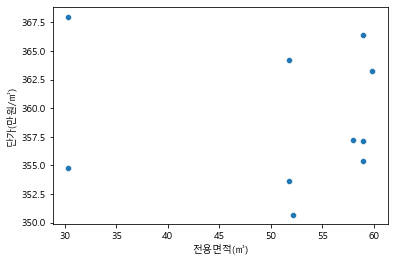

In [9]:
sns.scatterplot(addr_df['전용면적(㎡)'], addr_df['단가(만원/㎡)'])

In [ ]:
def mean_prices_per_size(df):
    df = df.copy()
    
    df['크기별_평균단가'] = df[['지번주소', '건축년도', '계약날짜', '전용면적(㎡)', '단가(만원/㎡)']].groupby(['지번주소', '건축년도', '계약날짜', '전용면적(㎡)']).transform('mean')['단가(만원/㎡)']
    df['크기별_평균총액'] = df[['지번주소', '건축년도', '계약날짜', '전용면적(㎡)', '거래금액(만원)']].groupby(['지번주소', '건축년도', '계약날짜', '전용면적(㎡)']).transform('mean')['거래금액(만원)']
    df = df[['지번주소', '건축년도', '건물연식', '계약날짜', '계약날짜기준_건물연식', '전용면적(㎡)', '크기별_평균총액', '크기별_평균단가']]
    df = df.drop_duplicates().reset_index(drop=True)
    
    return df

In [ ]:
yunrip_short_df = mean_prices_per_size(yunrip_selected_df)
print(yunrip_short_df.shape)
yunrip_short_df.head()